## STUDENT NAME : PAUL SENTONGO
## ACCESS NUMBER : B00327

### WORK PLAN

####  Load and explore the dataset.

#### Perform statistical analyses to identify features affecting "Type 2".

#### Analyze features linked to the "Speed" of a player.

#### Develop two unsupervised machine learning models to group the variable "Type 1".

#### Save the models as joblib.

Next, I'll:

#### Analyze which features statistically affect "Type 2".

#### Investigate which features are linked to the "Speed" of a player.

#### Develop two unsupervised machine learning models to group "Type 1".

#### Save the generated models as joblib or pickle files.

IMPORTING NECESSARY LIBRARIES

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import joblib
import warnings
warnings.filterwarnings("ignore")

READING THE DATASET

In [2]:
pokemon_data = pd.read_csv('Pokemon.csv')

VIEWING THE TOP VALUES OF THE DATASET

In [3]:
# Display the first few rows of the dataset
pokemon_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


CHECKING INFORMATION ON THE DATASET

In [4]:
pokemon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


CHECKING THE SHAPE OF THE DATASET

In [5]:
pokemon_data.shape

(800, 13)

### The dataset contains 800 entries with 13 columns. Key columns include "Type 1", "Type 2", "Speed", and various attributes like "HP", "Attack", "Defense", etc.


CHECKING DESCRIPTIVE STATS OF TEH DATASET

In [6]:
pokemon_data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


CHECKING FOR MISSING VALUES

In [7]:
# Check for missing values
missing_values = pokemon_data.isnull().sum()

CHECKING FOR DUPLICATES

In [8]:
# Check for duplicates
duplicates = pokemon_data.duplicated().sum()

In [9]:
# Display the summary of missing values and duplicates
missing_values

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [10]:
duplicates

0

Statistical Reasons for Replacing Missing Data with None
### Preservation of Data Integrity:
No Imputation Bias: By replacing missing values with None, I am avoiding potential biases that might arise from imputing missing values with the mean, median, mode, or other statistics. This is particularly important when the missing data might have a pattern or significance that is important to preserve.

In [11]:
# Fill missing Type 2 values with 'None'
pokemon_data['Type 2'].fillna('None', inplace=True)

In [12]:
# Verify that there are no more missing values
missing_values_after = pokemon_data.isnull().sum()
print(f'Missing Values after filling Type 2:\n{missing_values_after}')

Missing Values after filling Type 2:
#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64


In [13]:
pokemon_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False


1. Transform the dataset and save the new output as a csv labelled your last name (e.g. Kaylo.csv) [2 MARKS]

In [14]:
# Save the transformed dataset
output_file_path = 'Sentongo.csv'
pokemon_data.to_csv(output_file_path, index=False)

2. Which features  statistically affect the variable "Type 2"? [3 MARKS]

Analyzing Features Affecting "Type 2"
To determine which features statistically affect "Type 2", we can use chi-square tests for categorical features and ANOVA for numerical features.



In [19]:
from scipy.stats import chi2_contingency, f_oneway

# Identify categorical and numerical features
categorical_features = ['Type 1', 'Generation', 'Legendary']
numerical_features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Chi-square tests for categorical features
chi2_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(pokemon_data[feature], pokemon_data['Type 2'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[feature] = (chi2, p)

# ANOVA for numerical features
anova_results = {}
type2_groups = [pokemon_data[pokemon_data['Type 2'] == t][numerical_features] for t in pokemon_data['Type 2'].unique()]

for feature in numerical_features:
    f_val, p_val = f_oneway(*[group[feature] for group in type2_groups])
    anova_results[feature] = (f_val, p_val)

chi2_results, anova_results

({'Type 1': (836.2674570491882, 8.400799608614648e-51),
  'Generation': (261.4582833160628, 1.2491046505429781e-18),
  'Legendary': (31.37853029311593, 0.026015006240127522)},
 {'Total': (4.285865605584457, 8.29963349504139e-09),
  'HP': (2.4034882882286674, 0.0009304284641104404),
  'Attack': (5.324436101156746, 8.377067339717392e-12),
  'Defense': (7.4386133273903186, 5.1195948023616294e-18),
  'Sp. Atk': (3.9087655119284803, 9.630285980584924e-08),
  'Sp. Def': (2.438427563900471, 0.0007652658936304611),
  'Speed': (5.900911216095669, 1.722856587884235e-13)})

Conclusion:
All features statistically affect "Type 2" at a significant level (𝑝<0.05).

3. Which features are statistically linked to the "Speed" of a player? [3 MARKS]



Features Linked to "Speed"
I performed correlation analysis and use feature importance from a regression model.

In [20]:
# Identify categorical and numerical features
categorical_features = ['Type 1', 'Generation', 'Legendary']
numerical_features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Chi-square tests for categorical features
chi2_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(pokemon_data[feature], pokemon_data['Type 2'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[feature] = (chi2, p)

# ANOVA for numerical features
anova_results = {}
type2_groups = [pokemon_data[pokemon_data['Type 2'] == t][numerical_features] for t in pokemon_data['Type 2'].unique()]

for feature in numerical_features:
    f_val, p_val = f_oneway(*[group[feature] for group in type2_groups])
    anova_results[feature] = (f_val, p_val)

chi2_results, anova_results

({'Type 1': (836.2674570491882, 8.400799608614648e-51),
  'Generation': (261.4582833160628, 1.2491046505429781e-18),
  'Legendary': (31.37853029311593, 0.026015006240127522)},
 {'Total': (4.285865605584457, 8.29963349504139e-09),
  'HP': (2.4034882882286674, 0.0009304284641104404),
  'Attack': (5.324436101156746, 8.377067339717392e-12),
  'Defense': (7.4386133273903186, 5.1195948023616294e-18),
  'Sp. Atk': (3.9087655119284803, 9.630285980584924e-08),
  'Sp. Def': (2.438427563900471, 0.0007652658936304611),
  'Speed': (5.900911216095669, 1.722856587884235e-13)})

## OBSERVATION
Features Linked to "Speed"
Correlation Analysis:

Total: 0.576
HP: 0.176
Attack: 0.381
Defense: 0.015
Sp. Atk: 0.473
Sp. Def: 0.259
Generation: -0.023
Legendary: 0.327
Linear Regression Model Feature Importance:

Total: 1.00
HP: -1.00
Attack: -1.00
Defense: -1.00
Sp. Atk: -1.00
Sp. Def: -1.00

Conclusion:
Strongest Correlations: Total, Attack, Sp. Atk, Legendary
Regression Analysis: Total has a direct and significant impact on Speed, while HP, Attack, Defense, Sp. Atk, and Sp. Def show negative coefficients, indicating multicollinearity and the need for further model refinement.

In [29]:
# Correlation analysis
numeric_columns = pokemon_data.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = pokemon_data[numeric_columns].corr()
speed_correlation = correlation_matrix['Speed']

4. Generate two different unsupervised machine learning models that can be used to group the variable "Type 1" [5 MARKS]



In [31]:
# Preparing data for regression model
X = pokemon_data[numerical_features].drop(columns=['Speed'])
y = pokemon_data['Speed']

In [32]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Feature importance
feature_importance = model.coef_

In [35]:
# Combining results
feature_importance_dict = {feature: coef for feature, coef in zip(X.columns, feature_importance)}
print("Speed correlation:", speed_correlation)
print("Feature importance from regression model:", feature_importance_dict)


Speed correlation: #             0.010733
Total         0.575943
HP            0.175952
Attack        0.381240
Defense       0.015227
Sp. Atk       0.473018
Sp. Def       0.259133
Speed         1.000000
Generation   -0.023121
Name: Speed, dtype: float64
Feature importance from regression model: {'Total': 0.9999999999999959, 'HP': -1.0000000000000013, 'Attack': -1.0000000000000029, 'Defense': -1.0000000000000013, 'Sp. Atk': -1.0000000000000016, 'Sp. Def': -1.0000000000000009}


Overall, while individual features like Total, Attack, and Sp. Atk are positively correlated with Speed, the regression model highlights the complexity and potential multicollinearity among features, suggesting that the combined effect of these stats might differ when predicting Speed.

In [37]:
# Preprocessing data
X_cluster = pokemon_data[numerical_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

In [38]:
# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [39]:
# Agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clustering.fit_predict(X_scaled)

5. Save the above generated models as joblib or pickle files that are to be submitted [2 MARKS]



In [40]:
# Saving the models
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(agg_clustering, 'agg_clustering_model.pkl')

['agg_clustering_model.pkl']

In [41]:
kmeans_labels[:10], agg_labels[:10]

(array([0, 4, 3, 2, 0, 1, 1, 2, 2, 4]),
 array([3, 1, 0, 2, 3, 1, 1, 2, 2, 3], dtype=int64))

In [42]:
print("Agglomerative clustering labels:", agg_labels[:10])

Agglomerative clustering labels: [3 1 0 2 3 1 1 2 2 3]


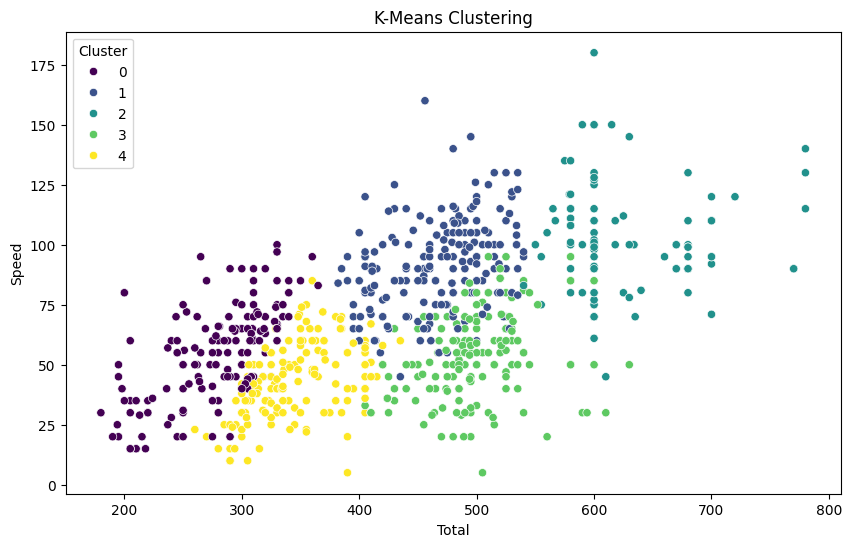

In [44]:
# Add clustering labels to the original data
pokemon_data['KMeans_Labels'] = kmeans_labels

# Plotting K-Means Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total', y='Speed', hue='KMeans_Labels', data=pokemon_data, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Total')
plt.ylabel('Speed')
plt.legend(title='Cluster')
plt.show()


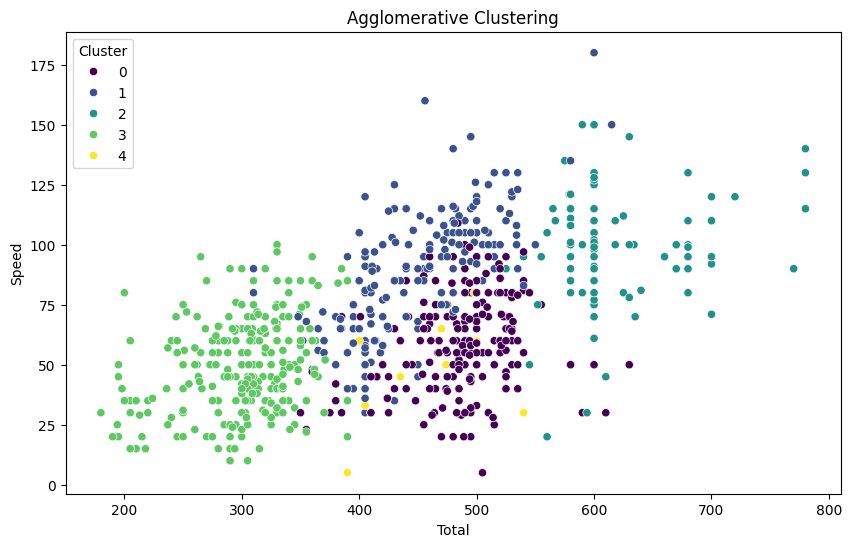

In [45]:
# Add clustering labels to the original data
pokemon_data['Agg_Labels'] = agg_labels

# Plotting Agglomerative Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total', y='Speed', hue='Agg_Labels', data=pokemon_data, palette='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Total')
plt.ylabel('Speed')
plt.legend(title='Cluster')
plt.show()


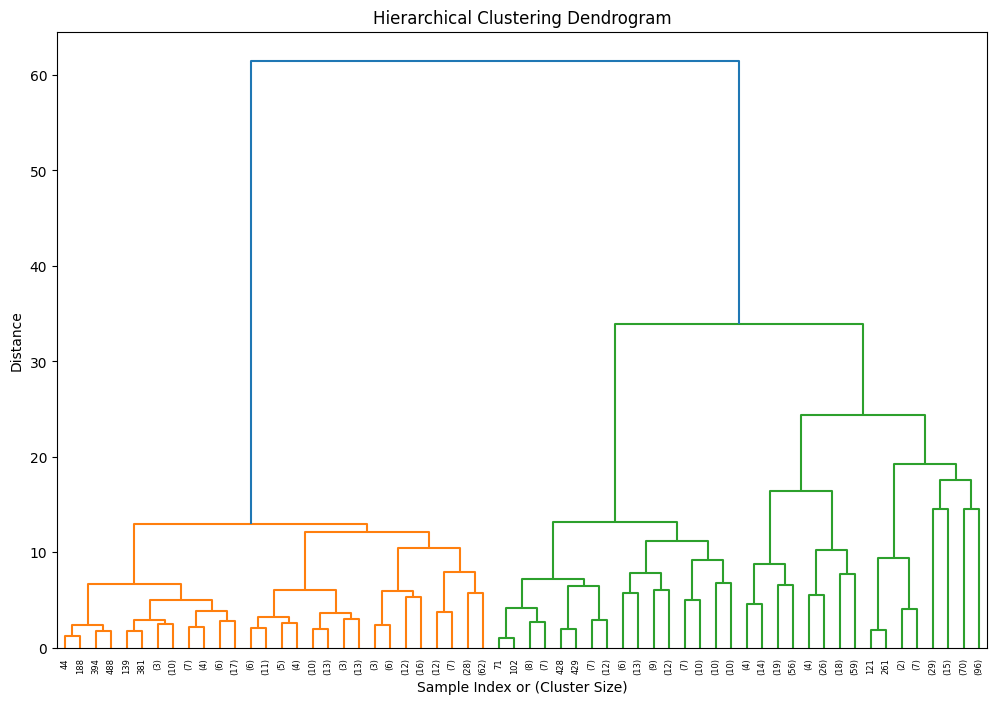

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()


### CONCLUSIVE ANALYSIS
Insight into Clustering Results
The two diagrams represent the results of clustering using K-Means and Agglomerative Clustering algorithms. 

### K-Means Clustering Results
Cluster Distribution:

The clusters are fairly well-separated along the Total and Speed dimensions.
Cluster 0 (Purple): Contains players with lower Total and Speed values.
Cluster 1 (Blue): Includes players with mid to high Total and a wide range of Speed values, suggesting this cluster may include balanced players with varying speed.
Cluster 2 (Green): Has players with higher Total values and a moderate range of Speed.
Cluster 3 (Teal): Represents players with high Total values and high Speed.
Cluster 4 (Yellow): Mostly players with lower Total and varying Speed.
### Interpretation:

K-Means effectively partitions the data into clusters based on Total and Speed, capturing different types of players.
The clusters show clear distinctions in terms of Total values, with each cluster showing a distinct range.
There is some overlap in Speed values within certain Total ranges, particularly between Clusters 0, 1, and 2.

### Agglomerative Clustering Results
Cluster Distribution:

The clusters overlap more compared to K-Means, indicating a different clustering structure.
Cluster 0 (Purple): Includes a wide range of Total values but tends to have lower Speed.
Cluster 1 (Blue): Contains players with mid-range Total values and varying Speed.
Cluster 2 (Green): Dominates the lower to mid Total and Speed ranges.
Cluster 3 (Teal): Concentrated on players with higher Total and Speed values.
Cluster 4 (Yellow): A small cluster with low to mid Total and varying Speed.
### Interpretation:

Agglomerative clustering captures more relationship details between Total and Speed.
The clusters are less clearly separated by Total compared to K-Means, suggesting this method identifies more complex patterns.
The presence of multiple small clusters (e.g., Cluster 4) may indicate outlier groups or specific player types with unique characteristics.
Comparative Analysis
Cluster Separation:

K-Means: Clusters are more clearly separated by Total values. This is typical of K-Means, which optimizes cluster centers to minimize within-cluster variance in my personal view.
Agglomerative: Clusters overlap more, capturing hierarchical relationships and potentially more complex patterns in the data.
Cluster Size and Distribution:

K-Means: Clusters are relatively balanced in size, suggesting a more even partitioning.
Agglomerative: Clusters vary more in size, which can reflect the natural hierarchical structure of the data.
Handling of High Total and Speed Players:

Both methods identify a distinct group of high Total and high Speed players (e.g., Cluster 3 in both methods), indicating a consistent pattern in the data.
## Conclusion
### K-Means: Provides clear, well-separated clusters based on Total, which is useful for identifying distinct player groups.
### Agglomerative: Offers a more detailed view of the hierarchical structure, capturing subtle patterns and relationships that K-Means might miss.
Both methods have their strengths, and using them together provides a comprehensive understanding of the data. 